# Insurance Claims Prediction: Finding the Most Informative Feature

<center><img src="car.jpg" width="500"></center>
---

Car insurance is mandatory in most countries, making the market huge — and competitive. Insurance providers aim to accurately assess the risk of a customer making a claim to set fair premiums and minimize losses.

On the Road Car Insurance has asked for help identifying the **single most predictive feature** that can be used in a simple model to predict whether a customer will file a claim. With limited infrastructure, they want something interpretable, measurable, and easy to implement.

 **Goal**:  
Build and compare single-feature logistic regression models and identify the **one feature** that gives the **highest accuracy** in predicting insurance claims.

 **Source**:  
[Accenture: Machine Learning in Insurance](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf)


## Dataset Overview

The dataset `car_insurance.csv` includes various customer attributes that may influence their likelihood to make a claim. Each row represents one customer.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [16]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

## Step 1: Load and Inspect the Data

We begin by loading the dataset and checking for:
- Missing values
- Data types
- Basic data distributions

In [17]:
car_insurance=pd.read_csv("car_insurance.csv")
car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [18]:
car_insurance.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

## 📈 Distribution of Credit Score

We observe the distribution and handle missing values by replacing them with the mean.

In [19]:
car_insurance["credit_score"]=car_insurance["credit_score"].fillna(car_insurance["credit_score"].mean())

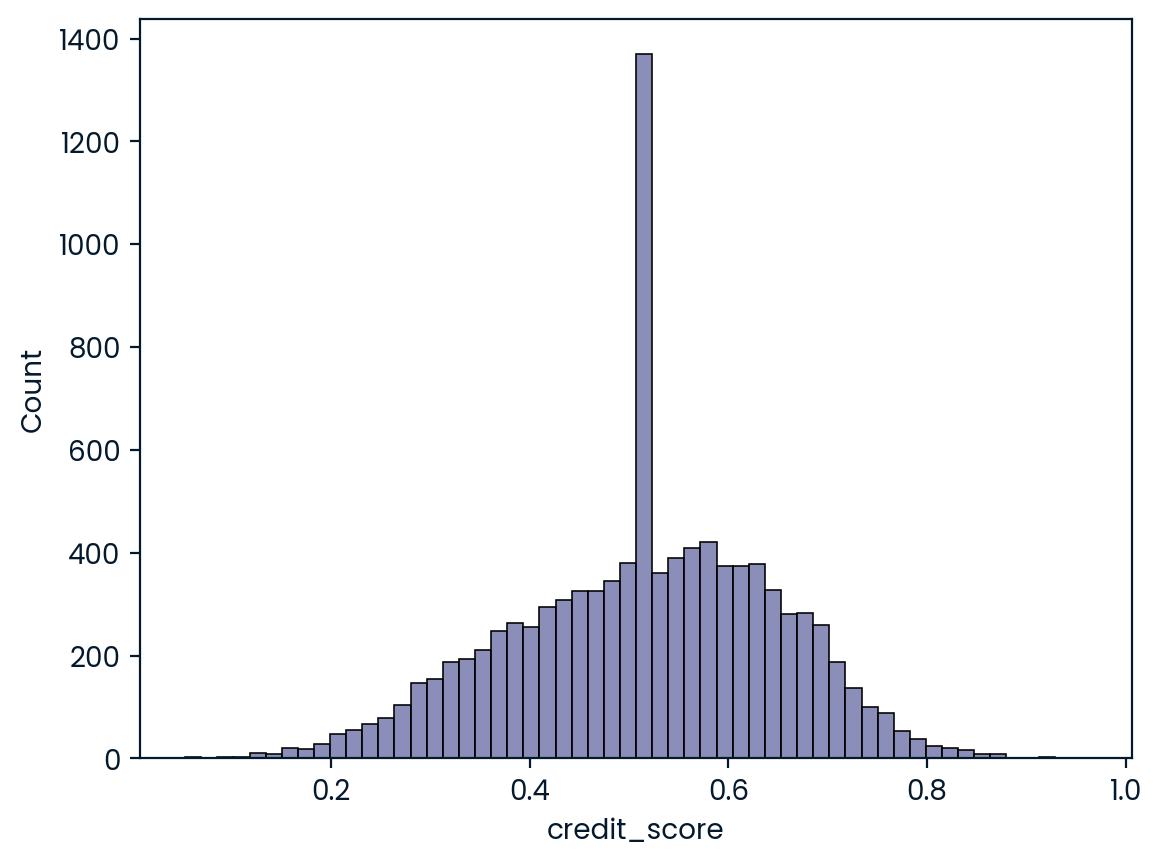

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(car_insurance["credit_score"])
plt.show()

## Distribution of Annual Mileage

Again, we fill missing values with the mean to prepare clean input for modeling.

In [21]:
car_insurance["annual_mileage"]=car_insurance["annual_mileage"].fillna(car_insurance["annual_mileage"].mean())

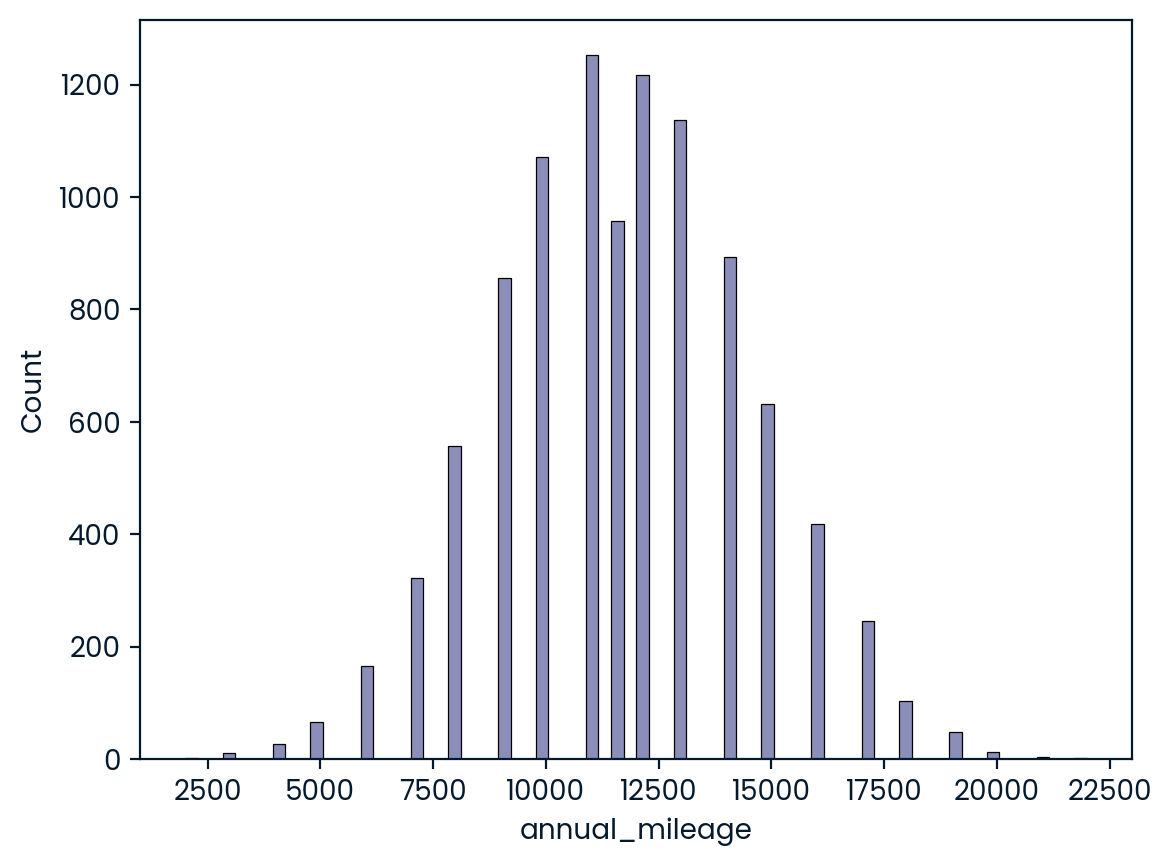

In [22]:
sns.histplot(car_insurance["annual_mileage"])
plt.show()

In [23]:
car_insurance.info()
car_insurance.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

## Step 2: Train Logistic Regression Models (One Feature at a Time)

We build separate logistic regression models using **one predictor at a time** to predict whether a customer will make a claim (`outcome`).

We use `statsmodels` for simplicity and interpretability.


In [24]:
models=[]
features=car_insurance.drop(["id","outcome"], axis=1).columns
print(features)

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')


In [25]:
for feature in features:
    model=logit(f"outcome ~ {feature}",data=car_insurance).fit()
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [26]:
print(models)

[<statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99aa5d5b80>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99a9939cd0>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99a9c00f40>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99a9cdcf40>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99a9c2e1f0>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99aa59af40>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99b6172970>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99b5e83550>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99aa5abb50>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99aa5379d0>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f99a9c1b490>, <statsmodels.discrete.discrete_model.BinaryResultsWrapper object

## Step 3: Evaluate Model Accuracy

We compute the accuracy of each model using the confusion matrix.  
Then we compare all models and identify the feature with the highest accuracy.


In [27]:
accuracies=[]
for i in range(len(models)):
    conf_matrix=models[i].pred_table()
    tn=conf_matrix[0,0]
    tp=conf_matrix[1,1]
    fn=conf_matrix[1,0]
    fp=conf_matrix[0,1]
    accuracy=(tn+tp)/(tn+tp+fn+fp)
    accuracies.append(accuracy)

In [28]:
print(accuracies)

[0.7747, 0.6867, 0.7771, 0.6867, 0.7425, 0.7054, 0.7351, 0.6867, 0.6867, 0.6867, 0.6867, 0.6904, 0.6867, 0.6867, 0.6867, 0.6867]


In [29]:
max_accuracy=max(accuracies)
index=accuracies.index(max_accuracy)
best_feature=features[index]
print(best_feature)

driving_experience


In [30]:
best_feature_df=pd.DataFrame({"best_feature": best_feature,
                             "best_accuracy":max_accuracy},index=[0])
print(best_feature_df)

         best_feature  best_accuracy
0  driving_experience         0.7771


## Result: Best Predictive Feature

Based on model accuracy, the following feature yields the **best predictive performance** when used alone:

- **Feature**: driving_experience
- **Accuracy**: 0.7771

This is a simple and interpretable model that On the Road Insurance can use as a starting point.
